**Twitter sentiment classification.**

The notebook will be used to create a model to determine twitter users sentiment regarding global warming based of twitter posts.


**Steps that will be followed**

1. Import all libraries used for data cleaning, preprocesing, EDA,  model building and evaluation.
2. Import training and testing data
3. Data cleaning and data preprocessing
4. Vecotorizing data
5. Feature selection
6. Model building and comparison
7. Metrics evaluation
8. Model hyperparameter tuning
9. Final model creation
10. Save model for reproducability

**Import libraries that will be used in this predict**

In [70]:
#Libaries to process data
import pandas as pd
import numpy as np

#Libaries for visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#import libraries to preprocess/clean twitter data
import string
import re
import nltk
nltk.download('omw-1.4')
from sklearn.preprocessing import LabelBinarizer

#import word cleaning and reformatting libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils import resample

#import feature extraction libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#import train test split library
from sklearn.model_selection import train_test_split

#import feature standarization library
from sklearn.preprocessing import StandardScaler

#import feature selection libraries
from sklearn.feature_selection import VarianceThreshold

#import all classifier models that will be used
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.multiclass import OneVsRestClassifier

#import libraries used for metrics of models
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#import hyper paramerter tuning libraries using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from scipy import sparse

#Save model
import pickle

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jeanj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Import training and testing data**

In [71]:
#import training and testing data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#print shape of training and testing data
print(train_df.shape)
print(test_df.shape)

(15819, 3)
(10546, 2)


In [72]:
#Display the header of training and testing data
print("Train data")
print(train_df.head())
print("\nTest data")
print(test_df.head())

Train data
   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

Test data
                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


In [73]:
#Reformat the dataframe view for training and testing data
train_df = train_df[['tweetid','message','sentiment']]
test_df = test_df[['tweetid','message']]
#Display the header of training and testing data
print("Train data")
print(train_df.head())
print("\nTest data")
print(test_df.head())

Train data
   tweetid                                            message  sentiment
0   625221  PolySciMajor EPA chief doesn't think carbon di...          1
1   126103  It's not like we lack evidence of anthropogeni...          1
2   698562  RT @RawStory: Researchers say we have three ye...          2
3   573736  #TodayinMaker# WIRED : 2016 was a pivotal year...          1
4   466954  RT @SoyNovioDeTodas: It's 2016, and a racist, ...          1

Test data
   tweetid                                            message
0   169760  Europe will now be looking to China to make su...
1    35326  Combine this with the polling of staffers re c...
2   224985  The scary, unimpeachable evidence that climate...
3   476263  @Karoli @morgfair @OsborneInk @dailykos \nPuti...
4   872928  RT @FakeWillMoore: 'Female orgasms cause globa...


**Data cleaning and preprocessing**

In [74]:
#Combine the training and testing data for data cleaning and preprocessing
df = pd.concat([train_df, test_df], axis=0)

In [75]:
#Show descriptive statistics information for the dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweetid,26365.0,499791.634971,288678.408660,6.0,249928.0,499577.0,748695.0,999983.0
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0


In [76]:
#Check if data have any blank values
df.isnull().sum()

tweetid          0
message          0
sentiment    10546
dtype: int64

In [77]:
#Remove all of the urls from message column
def remove_urls_lower(df_to_clean):
    #identify url pattern
    url_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    #new string for url
    url = r'urlweb'
    #replace with string
    df_to_clean['message'] = df_to_clean['message'].replace(to_replace=url_pattern, value=url,regex=True)
    df_to_clean['message'] = df_to_clean['message'].str.lower()
    return df_to_clean

#insert df and return df with urls removed
remove_urls_lower(df)

,tweetid,message,sentiment
0,625221,polyscimajor epa chief doesn't think carbon di...,1.0
1,126103,it's not like we lack evidence of anthropogeni...,1.0
2,698562,rt @rawstory: researchers say we have three ye...,2.0
3,573736,#todayinmaker# wired : 2016 was a pivotal year...,1.0
4,466954,"rt @soynoviodetodas: it's 2016, and a racist, ...",1.0
...,...,...,...
10541,895714,"rt @brittanybohrer: brb, writing a poem about ...",NaN
10542,875167,2016: the year climate change came home: durin...,NaN
10543,78329,rt @loop_vanuatu: pacific countries positive a...,NaN
10544,867455,"rt @xanria_00018: you’re so hot, you must be t...",NaN


In [78]:
#Remove all punctuation, numbers and special characters from message column
def remove_punctuation(message):
    punctuation = string.punctuation
    numbers = '0123456789'
    special_char = 'â€¦","ðŸ¥³ã¢‚¬.ï¿½'
    remove_char = punctuation+numbers+special_char
    cleaned_sentence = ''.join([char for char in message if char not in remove_char])
    #Remove unicode characters
    encode = cleaned_sentence.encode('ascii', 'ignore')
    decode_cleaned_sentence = encode.decode()
    return decode_cleaned_sentence

#apply remove _punctuation function on message column of whole dataframe
df['message'] =df['message'].apply(remove_punctuation)
df['message']

0        polyscimajor epa chief doesnt think carbon dio...
1        its not like we lack evidence of anthropogenic...
2        rt rawstory researchers say we have three year...
3        todayinmaker wired   was a pivotal year in the...
4        rt soynoviodetodas its  and a racist sexist cl...
                               ...                        
10541    rt brittanybohrer brb writing a poem about cli...
10542     the year climate change came home during the ...
10543    rt loopvanuatu pacific countries positive abou...
10544    rt xanria youre so hot you must be the cause f...
10545    rt chloebalaoing climate change is a global is...
Name: message, Length: 26365, dtype: object

In [79]:
#Create instance of Lemmatizer
lemmatized = WordNetLemmatizer()
#Create funtion to split, lemmatise and combine a sentence
def lemma_df(sentence, lemmatized):
    spliting = sentence.split(' ')
    lemmatized_sentence = [lemmatized.lemmatize(word) for word in spliting]
    combine_words = ' '.join(lemmatized_sentence)
    return combine_words
#apply lemma_df function on message column of whole dataframe
df['message'] = df['message'].apply(lemma_df, args=(lemmatized,))

In [80]:
#Split cleaned data into training and testing datasets
training_data = df[pd.notnull(df['sentiment'])]
testing_data = df[pd.isnull(df['sentiment'])].drop(['sentiment'],axis=1)

In [81]:
#create variable to store all of the english stopwords
stopwords_list = stopwords.words('english')
#create instance of countvectoriser
vect = CountVectorizer(stop_words=stopwords_list, ngram_range=(1,2), max_df=0.1, min_df=3)
#fit data to countvectoriser instance
X = vect.fit_transform(training_data['message'])
#display number of features selected
print(len(vect.get_feature_names()))

13289


C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
#confirm lenght of training data
len(X.toarray())

15819

In [83]:
#Create new dataframe with the vectorised training data
training_data_vectorised = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
training_data_vectorised['tweetid'] = training_data['tweetid'].values
training_data_vectorised['sentiment'] = training_data['sentiment'].values

In [84]:
#remove previous unused dataframes to lower memory usage
del train_df
del test_df
del df

In [85]:
#vectorise the testing data
Xtesting = vect.transform(testing_data['message'])
#confirm shape of vectorised testing data
print(Xtesting.shape)
#Create new dataframe with the vectorised testing data
testing_data_vectorised = pd.DataFrame(Xtesting.toarray(), columns=vect.get_feature_names())
testing_data_vectorised['tweetid'] = testing_data['tweetid'].values

(10546, 13289)


C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
#print shapes of testing and training dataframes
print(training_data_vectorised.shape)
print(testing_data_vectorised.shape)

(15819, 13291)
(10546, 13290)


In [87]:
#change classes to integer
training_data_vectorised['sentiment'] = training_data_vectorised['sentiment'].astype(int)

In [88]:
#remove previous unused dataframes to lower memory usage
del vect

In [89]:
#display vectorised testing dataframe header
testing_data_vectorised.head()

,aaa,ab,abandon,abandoned,abandoning,abandoning climate,abbott,abc,abc john,abc news,...,zealot,zero,zero question,zeroco,zika,zinke,zoe,zone,zone urlweb,tweetid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,169760
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35326
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,224985
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,476263
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,872928


In [90]:
#determine observations per response/class 
counting = training_data_vectorised['sentiment'].value_counts()
counting

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

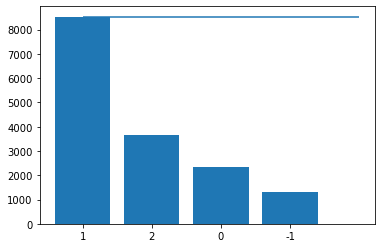

In [91]:
#display observations per response/class
plt.bar(counting.index.astype(str),counting.values)
plt.hlines(y=8530, xmin=0,xmax=4)

In [92]:
#print out amount per class
counting

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [93]:
#display training 
training_data_vectorised

,aaa,ab,abandon,abandoned,abandoning,abandoning climate,abbott,abc,abc john,abc news,...,zero,zero question,zeroco,zika,zinke,zoe,zone,zone urlweb,tweetid,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,625221,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,126103,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,698562,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,573736,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,466954,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22001,1
15815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17856,2
15816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,384248,0
15817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,819732,-1


In [94]:
#create individual training data for each response
response_1 = training_data_vectorised[training_data_vectorised['sentiment']==1]
response_2 = training_data_vectorised[training_data_vectorised['sentiment']==2]
response_0 = training_data_vectorised[training_data_vectorised['sentiment']==0]
response_neg_1 = training_data_vectorised[training_data_vectorised['sentiment']==-1]

In [95]:
#use the max observation class to upsample all data
middle_response = 8530

<BarContainer object of 4 artists>

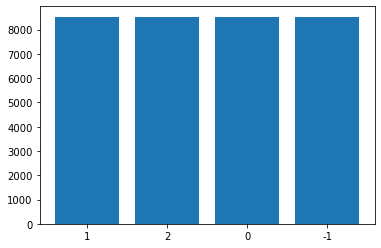

In [96]:
#resmaple the different class dataframes
response_1_downsample = resample(response_1, replace=False, n_samples= middle_response, random_state=42)
response_2_upsample = resample(response_2, replace=True, n_samples= middle_response, random_state=42)
response_0_upsample = resample(response_0, replace=True, n_samples= middle_response, random_state=42)
response_neg_1_upsample = resample(response_neg_1, replace=True, n_samples= middle_response, random_state=42)
#combined the resample datframes
train_resampled = pd.concat([response_1_downsample,response_2_upsample,response_0_upsample,response_neg_1_upsample], axis=0)
#display resamle class amount of observations
plt.bar(train_resampled['sentiment'].value_counts().index.astype(str),train_resampled['sentiment'].value_counts().values)

In [97]:
#remove previous unused dataframes to lower memory usage
del response_1
del response_2
del response_0
del response_neg_1
del response_1_downsample
del response_2_upsample
del response_0_upsample
del response_neg_1_upsample

In [98]:
#use the train dataset and define the feature and response data
X = train_resampled.drop(['tweetid','sentiment'], axis=1)
Y = train_resampled['sentiment']

In [99]:
#implement feature selection for vectorised data
threshold = VarianceThreshold(threshold=0.0002)
X_threshold_scaled_data = threshold.fit_transform(X)
#confirm shape of threshold
X_threshold_scaled_data.shape

(34120, 9297)

**Model testing**

Note: All classifiers model cross validations takes long

In [31]:
#Create a list of all model instances
#Adaboost removed, took to long to process
models = [LogisticRegression()
          ,DecisionTreeClassifier()
          ,RandomForestClassifier()
          ,SVC(max_iter=50)
          ,GaussianNB()
          ,KNeighborsClassifier()
          ,MLPClassifier()
          ,XGBClassifier()
          ,LGBMClassifier()
          ,OneVsRestClassifier(SVC(max_iter=50))]

#empty result list to save results
result = []
#Create a list of all model names
model_names = ['LR','DecisionTreeC','RandomForestC','SVC','naive_bayes','KNN','MLPC'
               ,'XGBoost','lgbm_model','OneVsRestClassifier']

#Create a tuple for each model name and instance and complete and used cross validation to measure model
for name, model in zip(model_names, models):
    if name == 'XGBoost':
        print(fr"Model: {name}")
        scores = cross_val_score(model, X_threshold_scaled_data, Y+1, cv=3, scoring= make_scorer(metrics.f1_score, average='macro'))
        mean_f1_score_score = scores.mean()
        std_score_score = scores.std()
        result.append([name, mean_f1_score_score, std_score_score])
    else:
        print(fr"Model: {name}")
        scores = cross_val_score(model, X_threshold_scaled_data, Y, cv=3, scoring= make_scorer(metrics.f1_score, average='macro'))
        mean_f1_score_score = scores.mean()
        std_score_score = scores.std()
        result.append([name, mean_f1_score_score, std_score_score])

Model: LR


C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model: DecisionTreeC
Model: RandomForestC
Model: SVC


C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model: naive_bayes
Model: KNN
Model: MLPC
Model: XGBoost
Model: lgbm_model
Model: OneVsRestClassifier


C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Con

In [65]:
#show result from cross validation
result

[['LR', 0.8900128887906824, 0.0017075103182687412],
 ['DecisionTreeC', 0.8797679742045293, 0.0024619134133815005],
 ['RandomForestC', 0.8945353831296203, 0.002498188975552828],
 ['SVC', 0.24957815292406282, 0.012443219056906027],
 ['naive_bayes', 0.7874661708269661, 0.0024212177482696036],
 ['KNN', 0.657605285614239, 0.012151591177479227],
 ['MLPC', 0.9055289137860206, 0.0018644144003853915],
 ['XGBoost', 0.7555288021550765, 0.004089065171725532],
 ['lgbm_model', 0.7586583699261938, 0.005806763695842867],
 ['OneVsRestClassifier', 0.25276649021004843, 0.015923772471949732]]

In [66]:
#Add results to a dataframe
results_df = pd.DataFrame(result, columns=[name, mean_f1_score_score, std_score_score])

In [67]:
#save results to an excel file
results_df.columns = ['name', 'mean_f1_score_score', 'std_score_score']
results_df.to_excel('results_notebook.xlsx')
results_df.sort_values('mean_f1_score_score',ascending=False)

,name,mean_f1_score_score,std_score_score
6,MLPC,0.905529,0.001864
2,RandomForestC,0.894535,0.002498
0,LR,0.890013,0.001708
1,DecisionTreeC,0.879768,0.002462
4,naive_bayes,0.787466,0.002421
8,lgbm_model,0.758658,0.005807
7,XGBoost,0.755529,0.004089
5,KNN,0.657605,0.012152
9,OneVsRestClassifier,0.252766,0.015924
3,SVC,0.249578,0.012443


**Hyperparameter tuning**

calculate_grid function will be used to calculate results from gridsearch using different parameters

In [100]:
def calculate_grid(estimator_used, parameters_chosen):
    #Use gridsearch to calculate Macro f1 score
    gridsearch = GridSearchCV(estimator=estimator_used, param_grid= parameters_chosen,scoring = make_scorer(metrics.f1_score, average='macro'), cv = 3, return_train_score=True)
    gridsearch.fit(X_threshold_scaled_data,Y)
    #Add results to dataframe and save to excel
    grid_results = pd.DataFrame(gridsearch.cv_results_)
    grid_results.to_excel('grid results.xlsx', index=False)
    #save mean and standard dev train and test scores
    view_mean = grid_results[['mean_train_score', 'mean_test_score','std_train_score', 'std_test_score']]
    #display best parameters
    print(f'\n{gridsearch.best_params_}')
    #print mean and standard dev train and test scores
    print(f'\n{view_mean}\n')
    #print mean train and test scores
    plt.plot(view_mean['mean_train_score'])
    plt.plot(view_mean['mean_test_score'])

Testing Data

In [101]:
#print vectorised testing data
testing_data_vectorised.head()

,aaa,ab,abandon,abandoned,abandoning,abandoning climate,abbott,abc,abc john,abc news,...,zealot,zero,zero question,zeroco,zika,zinke,zoe,zone,zone urlweb,tweetid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,169760
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35326
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,224985
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,476263
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,872928


In [102]:
#preprocess all testing data
print("Creating testing data")
#remove tweetid from testing data
X_testing_data = testing_data_vectorised.drop(['tweetid'], axis=1)
#feature selection transform testing data
X_testing_data =  threshold.transform(X_testing_data)
#confirm shape of testing data preprocessed
print(X_testing_data.shape)
X_testing_data

Creating testing data
(10546, 9297)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

DecisionTreeClassifier

C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users


{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}

   mean_train_score  mean_test_score  std_train_score  std_test_score
0          0.997934         0.867777         0.000036        0.004433
1          0.770968         0.710183         0.006049        0.006725



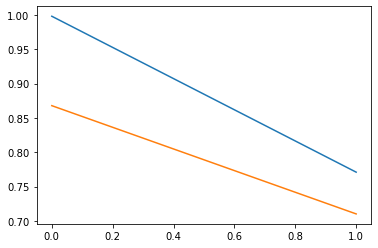

In [71]:
#iteration used to create unique values for parameter grid
iteration = [int(round(i,0)) for i in np.linspace(300, 550, 50)]
#identify parameters to test
parameter_grid = {'criterion': ['entropy'], 'min_samples_split' :[2], 'min_samples_leaf':[1,2], 'max_features' : ['auto'], 
                  'min_impurity_decrease':[0.0], 'ccp_alpha':[0.0]}
#calculate best parameters
calculate_grid(DecisionTreeClassifier(),parameter_grid)

In [72]:
#test decison tree on adjusted parameters
dt_clf =  DecisionTreeClassifier(ccp_alpha= 0.0, criterion= 'entropy', max_features= 'auto', min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
dt_clf.fit(X_threshold_scaled_data,Y)
y_pred = dt_clf.predict(X_testing_data)
#Convert results to dataframe and save as csv
result_testing = testing_data.copy()
result_testing['sentiment'] = y_pred
result_testing = result_testing[['tweetid','sentiment']]
result_testing.to_csv('dt_clf.csv', index=False)
print('Done')

C:\Users\jeanj\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Done


RandomForest non standardised data and threshold of 0.002


{'criterion': 'entropy', 'n_estimators': 100}

   mean_train_score  mean_test_score  std_train_score  std_test_score
0          0.993930         0.874702         0.000179        0.001439
1          0.997934         0.893145         0.000036        0.003579



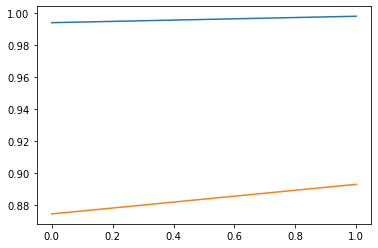

In [34]:
#iteration used to create unique values for parameter grid
iteration = [int(round(i,0)) for i in np.linspace(100, 200, 10)]
#define parameters
parameter_grid = {'n_estimators' : [10,100], 'criterion': ['entropy']}
#calculate best parameters
calculate_grid(RandomForestClassifier(), parameter_grid)

In [35]:
#test random forest on adjusted parameters
rf_clf =  RandomForestClassifier(n_estimators= 100 ,criterion= 'entropy', random_state=42)
rf_clf.fit(X_threshold_scaled_data,Y)
y_pred = rf_clf.predict(X_testing_data)
y_pred
#Convert results to dataframe and save as csv
result_testing = testing_data.copy()
result_testing['sentiment'] = y_pred
result_testing = result_testing[['tweetid','sentiment']]
result_testing.to_csv('rf_clf.csv', index=False)
print('Done')


Done


MLP classifier

In [103]:
#test MLP on adjusted parameters
MLP_clf =  MLPClassifier(
    hidden_layer_sizes = (300,200,100), 
    max_iter= 100,
    activation= 'relu',
    solver= 'adam', 
    alpha= 0.001,
    learning_rate= 'adaptive', random_state=42)
#Convert results to dataframe and save as csv
MLP_clf.fit(X_threshold_scaled_data,Y)
y_pred = MLP_clf.predict(X_testing_data)
y_pred

result_testing = testing_data.copy()
result_testing['sentiment'] = y_pred
result_testing = result_testing[['tweetid','sentiment']]
result_testing.to_csv('MLP_clf.csv', index=False)
print('Done')

Done


In [104]:
#import tensorflow and keras to use neural network model
import tensorflow as tf
#import dense and sequential libraries for model layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#reformat y train for model
Y_nn = train_resampled['sentiment'] + 1
#change shape of training and testing data
X_threshold_scaled_data_reshaped = np.array(X_threshold_scaled_data).reshape(-1,X_threshold_scaled_data.shape[1])
X_testing_data_reshaped = np.array(X_testing_data).reshape(-1,X_threshold_scaled_data.shape[1])

#Create model instance and determine layers, neurals and activation features
model = Sequential([
    Dense(350,activation='relu', input_shape=(X_threshold_scaled_data.shape[1],)),
    Dense(250, activation='relu'),
    Dense(150, activation='relu'),
    Dense(4, activation='softmax')])
#determine metrics, loss function and compiler
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#fit model
model_history = model.fit(X_threshold_scaled_data_reshaped, np.array(Y_nn).reshape(-1,), batch_size=100, epochs=4, validation_split=0.1)
#predict y variable for test data
y_pred = model.predict(X_testing_data_reshaped)

result_testing = testing_data.copy()
print('done')
#add all y predictions to result dataframe
result_testing['sentiment'] = [x for x in y_pred]

Epoch 1/4
308/308 [==============================] - 14s 45ms/step - loss: 0.5359 - accuracy: 0.7934 - val_loss: 0.2059 - val_accuracy: 0.9437
Epoch 2/4
308/308 [==============================] - 13s 41ms/step - loss: 0.1147 - accuracy: 0.9635 - val_loss: 0.1344 - val_accuracy: 0.9739
Epoch 3/4
308/308 [==============================] - 13s 41ms/step - loss: 0.0401 - accuracy: 0.9889 - val_loss: 0.1210 - val_accuracy: 0.9830
Epoch 4/4
330/330 [==============================] - 3s 9ms/step
done


In [105]:
#print y prediction shape
y_pred.shape

(10546, 4)

In [106]:
#display result dataframe information
result_testing

,tweetid,message,sentiment
0,169760,europe will now be looking to china to make su...,"[0.0011720487, 0.001041288, 0.95296025, 0.0448..."
1,35326,combine this with the polling of staffer re cl...,"[5.3861557e-05, 0.0013281152, 0.9981976, 0.000..."
2,224985,the scary unimpeachable evidence that climate ...,"[3.769451e-09, 4.262308e-08, 0.99999905, 8.943..."
3,476263,karoli morgfair osborneink dailykos \nputin go...,"[1.706457e-05, 0.997474, 0.0025083988, 4.35796..."
4,872928,rt fakewillmoore female orgasm cause global wa...,"[0.0017192034, 0.8593166, 0.12880662, 0.010157..."
...,...,...,...
10541,895714,rt brittanybohrer brb writing a poem about cli...,"[0.81731313, 0.01113892, 0.17052948, 0.0010184..."
10542,875167,the year climate change came home during the ...,"[7.704395e-06, 6.603195e-05, 0.99922025, 0.000..."
10543,78329,rt loopvanuatu pacific country positive about ...,"[3.123198e-07, 0.027871413, 0.6196939, 0.3524343]"
10544,867455,rt xanria youre so hot you must be the cause f...,"[2.370947e-07, 0.99999464, 5.178094e-06, 3.290..."


In [107]:
#create function to change scientific values to float
def change(list_num):
    empty = []
    for x in list_num:
        empty.append(round(float(x),4))
    return empty

In [108]:
#apply change function on y predictions
result_testing['sentiment'] = result_testing['sentiment'].apply(change)

In [109]:
#display the location of max probability class and return correct response variable
def locate_max(number_list):
    location_list = number_list.index(max(number_list))
    return location_list -1

In [110]:
#apply locate max function on sentiment
result_testing['sentiment'] = result_testing['sentiment'].apply(locate_max)

In [111]:
#display sentiment data
result_testing['sentiment']

0        1
1        1
2        1
3        0
4        0
        ..
10541   -1
10542    1
10543    1
10544    0
10545    1
Name: sentiment, Length: 10546, dtype: int64

In [112]:
#show sentiment count per class
result_testing['sentiment'].value_counts()

 1    6544
 2    2234
 0    1164
-1     604
Name: sentiment, dtype: int64

In [113]:
#export results to csv for submission
result_testing = result_testing[['tweetid','sentiment']]
result_testing.to_csv('NNC_clf.csv', index=False)
print('Done')

Done


**Save model used**

In [114]:
#use file format h5 and store structured data
file = 'model.h5'
#save model
model.save(file)

In [115]:
#import load_model library
from tensorflow.keras.models import load_model

In [116]:
#load the saved classification model
loaded_classification_model = load_model(file)

In [117]:
#test prediction of y
y_pred = model.predict(X_testing_data_reshaped)
#create copy of test data
result_testing = testing_data.copy()

#add all y predictions to result dataframe
result_testing['sentiment'] = [x for x in y_pred]
#create function to change scientific values to float
def change(list_num):
    empty = []
    for x in list_num:
        empty.append(round(float(x),4))
    return empty
#apply change function on y predictions
result_testing['sentiment'] = result_testing['sentiment'].apply(change)
#display the location of max probability class and return correct response variable
def locate_max(number_list):
    location_list = number_list.index(max(number_list))
    return location_list -1
#display sentiment data
result_testing['sentiment'] = result_testing['sentiment'].apply(locate_max)
result_testing['sentiment']

330/330 [==============================] - 3s 8ms/step


0        1
1        1
2        1
3        0
4        0
        ..
10541   -1
10542    1
10543    1
10544    0
10545    1
Name: sentiment, Length: 10546, dtype: int64

Save MLP model

In [118]:
file_save = "MLP_model.pkl"
with open(file_save,'wb') as file:
    pickle.dump(MLP_clf,file)
    
with open(file_save,'rb') as file:
    unpickled = pickle.load(file)
    
y_prediction = unpickled.predict(X_testing_data)
y_prediction

array([1, 1, 1, ..., 0, 0, 1])

**Conclusion**

Neural network classifier was used for final submission.
Neural networks are used for non linear models and uses batching of observations that are moved through layers and nodes.
Completion of all batches/observations is considered as one Epoch. In this model I have used 4 epochs and the loss function 'sparse_categorical_crossentropy'.
Each layer was follewed in sequence and relyed on the relu activation. The output activation was the softmax that calculated the probability of features belonging to a class.
I have then identified the highest probability class for each response and used this for the final output.